<a href="https://www.kaggle.com/code/mohd647/zomato-bangalore-data-eda?scriptVersionId=136843358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis of Bangalore-Based Restaurants (Zomato)

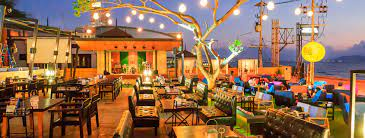

- Bengaluru has a diverse food culture with restaurants offering a range of cuisines from around the world. There are approximately **12,000** restaurants in the city, and new ones are opening every day. 
However, new restaurants face challenges such as 
1. high real estate costs, 
1. rising food costs, 
1. and shortage of quality manpower. 

- **Problem Statement:**
The objective of this project is to analyze Bangalore-based restaurants data registered on Zomato and get valuable insights. Our goal is to understand the restaurant landscape in Bangalore, identify popular cuisines, explore the impact of online ordering and table booking, analyze cost distributions, and make recommendations to improve customer satisfaction and business growth.
It can also help people in finding best restaurants according to their preferences and needs in the city.

- **Dataset:**
The dataset used for this analysis consists of Bangalore-based restaurants registered on Zomato. It includes several columns with relevant information such as restaurant names, online order availability, table booking options, ratings, votes, location, restaurant type, cuisines, cost for two persons, and more. The dataset provides a comprehensive view of the restaurants and their characteristics, which allows us to perform a detailed analysis.

 * **Step 1:** Data Profiling and Cleaning
 * **Step 2:** Exploratory Data Analysis (EDA)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
random.seed(42)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
5
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
%autosave 1

Autosaving every 1 seconds


In [3]:
data = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

# Take an overview of data

In [4]:
data.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4351,https://www.zomato.com/bangalore/sonas-kitchen...,"Orchid Lakeview Apartments, Opposite Bellandur...",Sona's Kitchen,No,No,NaN,0,+91 8105621699,Bellandur,"Takeaway, Delivery",NaN,North Indian,300,[],[],Delivery,Bellandur
33045,https://www.zomato.com/bangalore/cucumber-town...,"45, Kasthuri Nivasa, 2nd Floor, 19th Main, 2nd...",Cucumber Town,Yes,No,4.2 /5,310,+91 8884566443\r\n+91 8043365726,BTM,Delivery,"Appam, Chicken Biryani, Kizhi Biryani, Kuluki ...","Kerala, North Indian",600,"[('Rated 3.0', 'RATED\n One among those place...","['4 Appam with Kadala Curry Combo', '4 Appam w...",Delivery,Koramangala 6th Block
13991,https://www.zomato.com/bangalore/just-bake-ele...,"1212, 9th Cross, SRI Ananthnagar, Near More Su...",Just Bake,No,No,NaN,0,080 43715252\r\n+91 9972745252,Electronic City,Bakery,NaN,"Bakery, Desserts",400,"[('Rated 4.0', 'RATED\n Regarding taste none ...",[],Desserts,Electronic City
29297,https://www.zomato.com/bangalore/china-down-to...,"417/1&417/2, 100 Feet Road, 4th Block, Koraman...",China Down Town,Yes,No,3.5 /5,5,+91 6382350360,Koramangala 4th Block,Casual Dining,NaN,Chinese,800,"[('Rated 5.0', 'RATED\n I went to play footba...",[],Buffet,Koramangala 5th Block
38251,https://www.zomato.com/bangalore/house-of-tast...,"#235/1 12th Cross, Wilson Garden, Bangalore",House of Tasty Food,Yes,No,NaN,0,+91 9538004054,Wilson Garden,Quick Bites,NaN,North Indian,400,[],[],Delivery,Lavelle Road


In [5]:
#basic Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**rate and approx_cost(for two people) datatypes should be int/float but they aren't.**

In [6]:
#Shape of the data
data.shape

(51717, 17)

* Total No. of Rows: 51717
* Total No of Columns: 17

In [7]:
# Check missing values
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**It is showing that there are missing or null values in some of the columns.**

In [8]:
# Dropping irrelevant columns 

data.drop(['url', 'address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'],axis = 1,inplace=True)

In [9]:
# Renaming columns approx_cost(for two people) and listed_in(type) to make analysis easy.

data.rename(columns={'approx_cost(for two people)':'cost2persons','listed_in(type)':'type'},inplace=True)

In [10]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2persons,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Explore unique values in categorical columns

In [11]:
data["online_order"].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [12]:
data.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

# Modifying rate column

In [13]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**Will Keep the numerator part only.**

In [14]:
#Applyig lambda fuction on rate column
data['rate'] = data['rate'].apply(lambda x: x if x not in ['NEW', '-'] else np.nan)
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
#Removing '/' from the rate and converting it to float
data['rate'] = [float(str(value).split('/')[0]) for value in data['rate']]
data['rate'].round(1).unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [16]:
#Filling NAN values with mean of the rate column
data['rate'].fillna(data['rate'].mean(),inplace=True)

In [17]:
data['rate'].isna().sum()

0

# Modifying "cost2persons" Column

In [18]:
data['cost2persons']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: cost2persons, Length: 51717, dtype: object

**we shall remove comma and change datatype of cost2persons.**

In [19]:
# Remove commas from the 'cost2persons' column
#data['cost2persons'] = data['cost2persons'].str.replace(',', '')

In [20]:
#data['cost2persons'].astype(float)

In [21]:
#Function to modify cost column

def modify_cost(cost):
    cost= str(cost)
    if ',' in cost:
        cost= cost.replace(',', '')
        return float(cost)
    else:
        return float(cost)
data['cost2persons'] = data['cost2persons'].apply(modify_cost)

In [22]:
data['cost2persons']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost2persons, Length: 51717, dtype: float64

In [23]:
data['votes']

0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int64

# Modifying "rest_type" Column

In [24]:
rest_type_count = data['rest_type'].value_counts()

In [25]:
rest_type_count

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [26]:
less_than_500 = rest_type_count[rest_type_count<500]

In [27]:
less_than_500

Sweet Shop                    468
Bar, Casual Dining            425
Lounge                        396
Pub                           357
Fine Dining                   346
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 82, dtype: int64

In [28]:
#Function to modify rest_type column

def modify_type(rest):
    if rest in less_than_500:
        return 'others'
    else:
        return rest
data['rest_type'] = data['rest_type'].apply(modify_type)

In [29]:
data['rest_type']

0        Casual Dining
1        Casual Dining
2               others
3          Quick Bites
4        Casual Dining
             ...      
51712              Bar
51713              Bar
51714              Bar
51715              Bar
51716           others
Name: rest_type, Length: 51717, dtype: object

# Modifying "location" Column

In [30]:
location = data['location'].value_counts()
location

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [31]:
loc_250  = location[location<250]

In [32]:
loc_250.head()

Wilson Garden            246
Bommanahalli             238
Koramangala 3rd Block    216
Kumaraswamy Layout       195
Thippasandra             194
Name: location, dtype: int64

In [33]:
#Function to modify location column

def modify_location(loc):
    if loc in loc_250:
        return 'others'
    else:
        return loc
data['location'] = data['location'].apply(modify_location)

In [34]:
data['location'].value_counts()['others']

4140

# Now our data is ready to be analysed:

In [35]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2persons,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [36]:
#Grouping location and online by appropriate aggregate fucntions**
df= data.groupby(['location','online_order']).agg({'rate':'mean','votes':'sum','cost2persons':'mean'}).reset_index()
df

,location,online_order,rate,votes,cost2persons
0,BTM,No,3.588581,147253,377.134768
1,BTM,Yes,3.611164,472123,406.734694
2,Banashankari,No,3.606437,34628,368.463476
3,Banashankari,Yes,3.699837,127746,462.377210
4,Banaswadi,No,3.565925,6712,375.806452
...,...,...,...,...,...
85,Vasanth Nagar,Yes,3.674165,12720,423.129252
86,Whitefield,No,3.624551,180586,640.000000
87,Whitefield,Yes,3.657926,286243,561.633011
88,others,No,3.631572,129165,576.722410


In [37]:
#df.sort_values(by=['rate'],ascending=False)

# Let's visualize the data

In [38]:
#Importing all the necessary or required libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation Between Columns

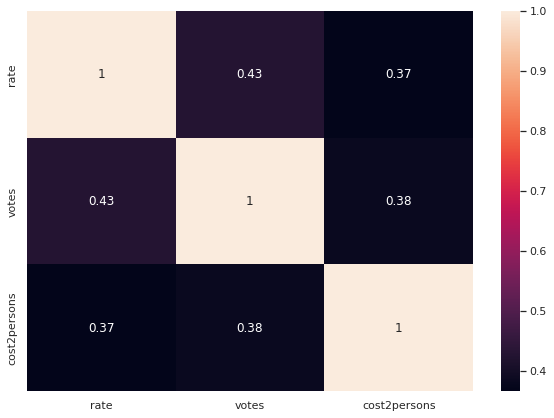

In [39]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(data.corr(),annot = True) 
plt.show()

- Not a very strong correlation between votes, cost for 2 persons, and ratings.

# Distribution of Restaurant Ratings

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          51717 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   cost2persons  51371 non-null  float64
 9   type          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [41]:
data.describe(include= ['object','float64','int64'])

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2persons,type
count,51717,51717,51717,51717.000000,51717.000000,51696,51490,51672,51371.000000,51717
unique,8792,2,2,NaN,NaN,45,12,2723,NaN,7
top,Cafe Coffee Day,Yes,No,NaN,NaN,BTM,Quick Bites,North Indian,NaN,Delivery
freq,96,30444,45268,NaN,NaN,5124,19132,2913,NaN,25942
mean,NaN,NaN,NaN,3.700449,283.697527,NaN,NaN,NaN,555.431566,NaN
std,NaN,NaN,NaN,0.395391,803.838853,NaN,NaN,NaN,438.850728,NaN
min,NaN,NaN,NaN,1.800000,0.000000,NaN,NaN,NaN,40.000000,NaN
25%,NaN,NaN,NaN,3.500000,7.000000,NaN,NaN,NaN,300.000000,NaN
50%,NaN,NaN,NaN,3.700449,41.000000,NaN,NaN,NaN,400.000000,NaN
75%,NaN,NaN,NaN,3.900000,198.000000,NaN,NaN,NaN,650.000000,NaN


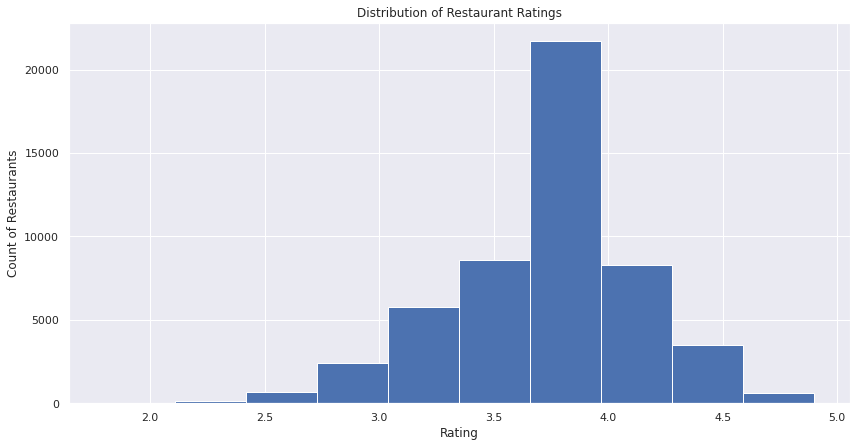

In [42]:
plt.figure(figsize=(14,7))
plt.hist(data["rate"], bins=10)
plt.xlabel("Rating")
plt.ylabel("Count of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()


In [43]:
data.rate.mean()

3.700448817952718

In [44]:
data.rate.median()

3.700448817952718

- Most of the restaurants have rating between 3.5 & 4.
- The average rating is 3.7.

# Distribution of Costs:

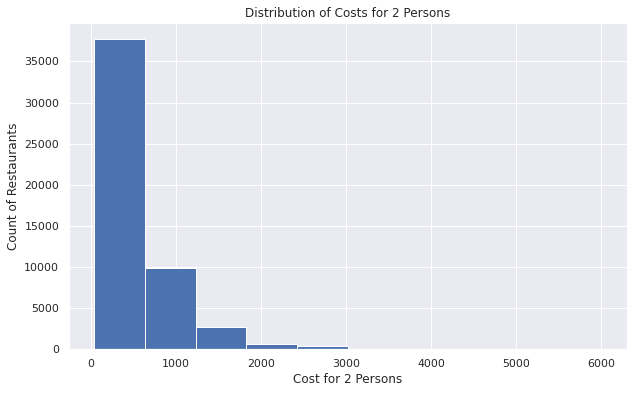

In [45]:
plt.figure(figsize=(10,6))
plt.hist(data["cost2persons"], bins=10)
plt.xlabel("Cost for 2 Persons")
plt.ylabel("Count of Restaurants")
plt.title("Distribution of Costs for 2 Persons")
plt.show()

* Restaurants with a cost for 2 persons less than 500 are more numerous.
* But there are also a few expensive restaurants.

# Scatter plot between cost2persons and rating [Hue: online_order]

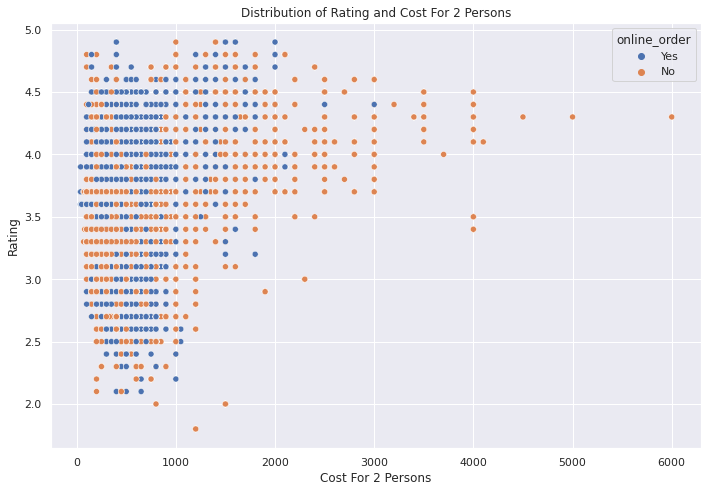

In [46]:
sns.scatterplot(x='cost2persons', y='rate', data=data, hue='online_order')
plt.xlabel("Cost For 2 Persons")
plt.ylabel("Rating")
plt.title("Distribution of Rating and Cost For 2 Persons")

plt.tight_layout()

> It will help to understand the distribution of cost2persons, rating and online_order in deep.

# Distribution of Restaurant Types

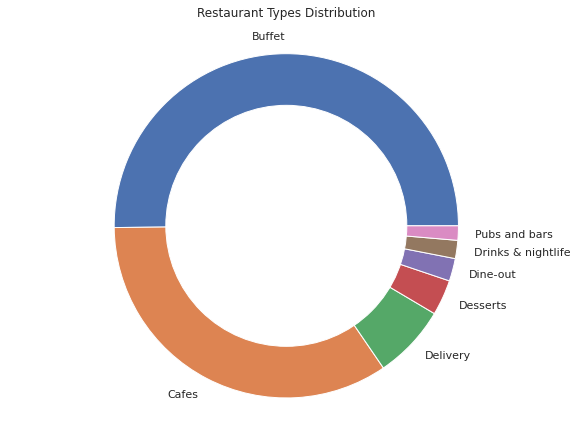

In [47]:
restaurant_counts = data['type'].value_counts()
labels = data['type'].unique()
sizes = restaurant_counts.values

plt.pie(sizes, labels=labels, autopct='', wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf() # get the current figure
fig.gca().add_artist(centre_circle) # It will add a circle with white color in the current figure which will result into a donut chart.
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular
plt.title('Restaurant Types Distribution', pad=20)
plt.show()

* Buffet and Cafes are the most famous in the city.

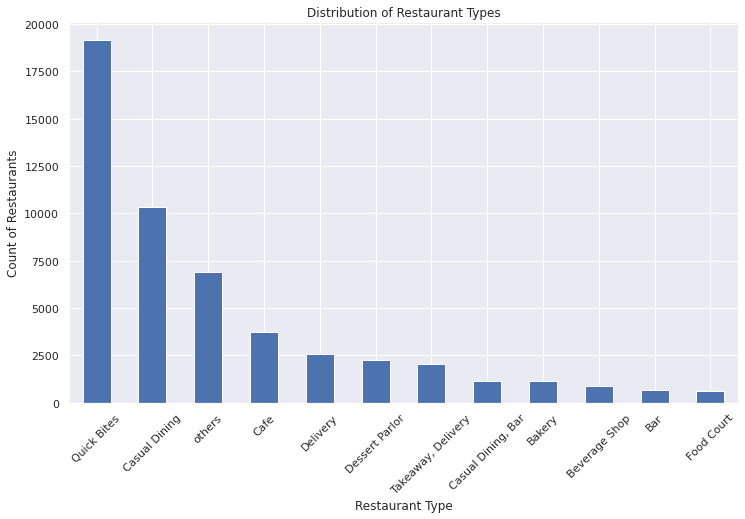

In [48]:
plt.figure(figsize=(12, 7))
data["rest_type"].value_counts().plot(kind="bar")
plt.xlabel("Restaurant Type")
plt.ylabel("Count of Restaurants")
plt.title("Distribution of Restaurant Types")
plt.xticks(rotation=45)
plt.show()

* QQuick Bites and Casual Dining are the most common.

# Top 10 famous restaurant chains in Bangalore

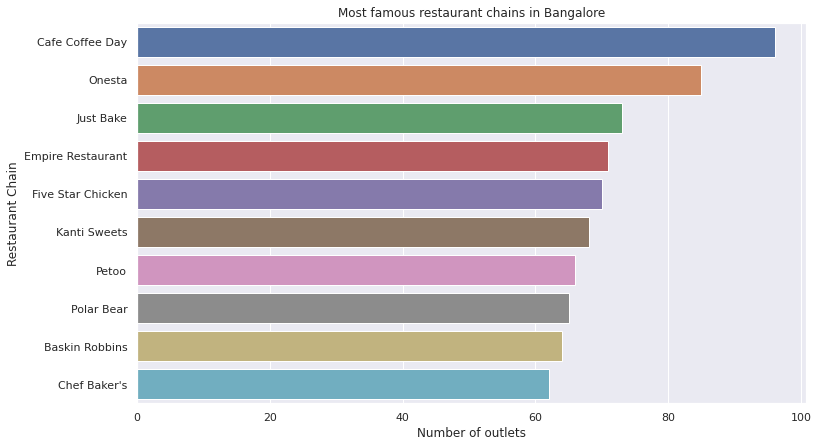

In [49]:
top_rest_chains = data['name'].value_counts()
top_rest_chains = top_rest_chains.sort_values(ascending=False).head(10)

plt.figure(figsize=(12,7))
sns.barplot(x=top_rest_chains.values, y=top_rest_chains.index)
plt.title("Most famous restaurant chains in Bangalore")
plt.xlabel("Number of outlets")
plt.ylabel("Restaurant Chain")
plt.show()

* Top 10 Restaurant chains are 

1. Cafe Coffee Day
1. Onesta
1. Just Bake 
1. Empire Restaurant
1. Five Star Chicken
1. Kanti Sweets
1. Petoo 
1. Polar Bear
1. Baskin Robbins 
1. Chef Baker's

In [50]:
df[(df['rate'] > 4) & (df['cost2persons'] < 1000) & (df['votes'] > df['votes'].mean())]

,location,online_order,rate,votes,cost2persons
17,Church Street,Yes,4.009050,406302,805.102041
21,Cunningham Road,Yes,4.018891,274658,882.817337


* Locations which are best for 2 persons under a budget of Rs. 1000 are:

1. Church Street
1. Cunningham Road
1. St. Marks Road

# Which are the best restaurants for a typical customer?

By best, I mean whose rating are more than 4, cost2persons are less than 50% of all the restaurants and votes are greater than average value of all the votes.

Let's see.

In [51]:
med_cost  = data.cost2persons.median()
print('Median Cost for 2 persons',med_cost)

Median Cost for 2 persons 400.0


In [52]:
avg_votes = data['votes'].mean()
print('Average of Votes',avg_votes)

Average of Votes 283.69752692538236


In [53]:
famous_rest = data[(data['rate'] >= 4) & (data['cost2persons'] < med_cost) & (data['votes'] > avg_votes)]
famous_rest

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2persons,type
71,The Biryani Cafe,No,No,4.1,520,Banashankari,Quick Bites,"Biryani, Chinese, Kebab",300.0,Delivery
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,Basavanagudi,Quick Bites,South Indian,150.0,Delivery
188,Kedia's Fun Food,Yes,No,4.3,630,Jayanagar,Quick Bites,"North Indian, Street Food, Juices",200.0,Delivery
191,Mini Punjabi Dhaba,Yes,No,4.2,287,Banashankari,Quick Bites,North Indian,350.0,Delivery
208,Mystique Palate,Yes,No,4.1,337,Jayanagar,Quick Bites,"Chinese, Fast Food",300.0,Delivery
...,...,...,...,...,...,...,...,...,...,...
49728,Natural Ice Cream,No,No,4.3,393,Sarjapur Road,Dessert Parlor,"Ice Cream, Beverages",200.0,Dine-out
49878,Phulke Ghar Ke,Yes,No,4.0,545,Bellandur,Quick Bites,"North Indian, Chinese",300.0,Dine-out
50153,Chatpatlal Sweets & Snacks,Yes,No,4.1,342,Marathahalli,others,"Street Food, Mithai, North Indian, Beverages, ...",200.0,Delivery
50324,Chai Galli,Yes,No,4.1,826,Brookefield,Cafe,"Cafe, Street Food",300.0,Delivery


# Locations of Famous Restaurants

In [54]:
famous_rest[['location','name']]

,location,name
71,Banashankari,The Biryani Cafe
76,Basavanagudi,Sri Guru Kottureshwara Davangere Benne Dosa
188,Jayanagar,Kedia's Fun Food
191,Banashankari,Mini Punjabi Dhaba
208,Jayanagar,Mystique Palate
...,...,...
49728,Sarjapur Road,Natural Ice Cream
49878,Bellandur,Phulke Ghar Ke
50153,Marathahalli,Chatpatlal Sweets & Snacks
50324,Brookefield,Chai Galli


In [55]:
#data['cost2persons'].value_counts()
#data['cost2persons'].value_counts()[600.0]

# Distribution of Ratings by Location and Online Order

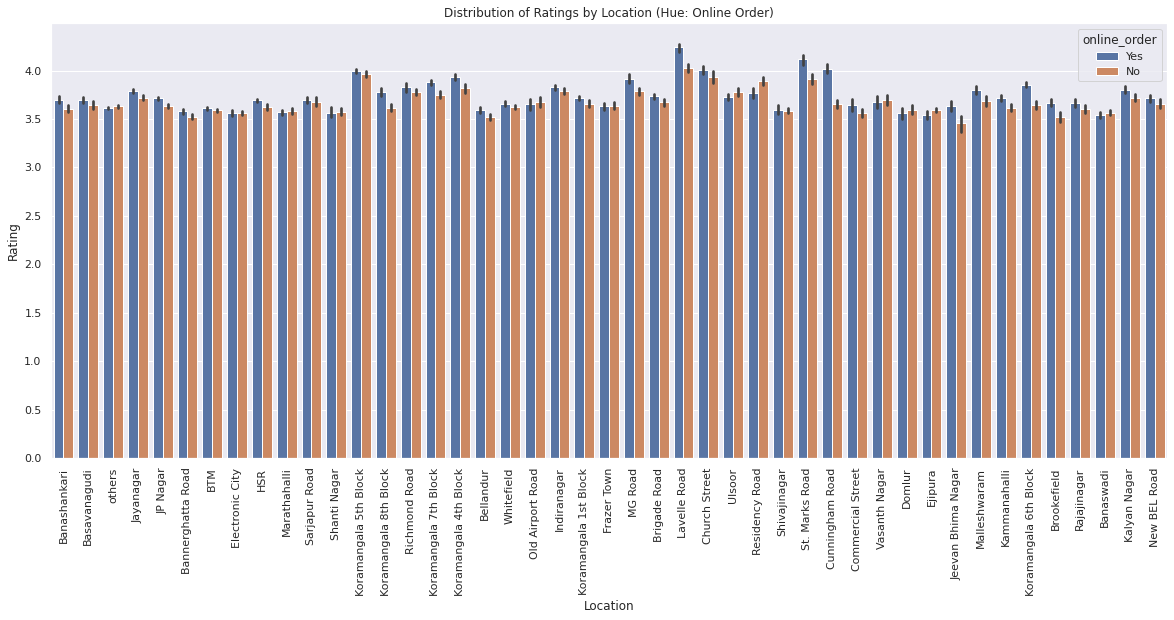

In [56]:
plt.figure(figsize=(20,8))

sns.barplot(data=data, x="location", y="rate", hue="online_order")
plt.title("Distribution of Ratings by Location (Hue: Online Order)")
plt.xlabel("Location")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.show()

* Locations where online service is available are getting higher rating.

# Distribution of Restaurants by Location and Online Order

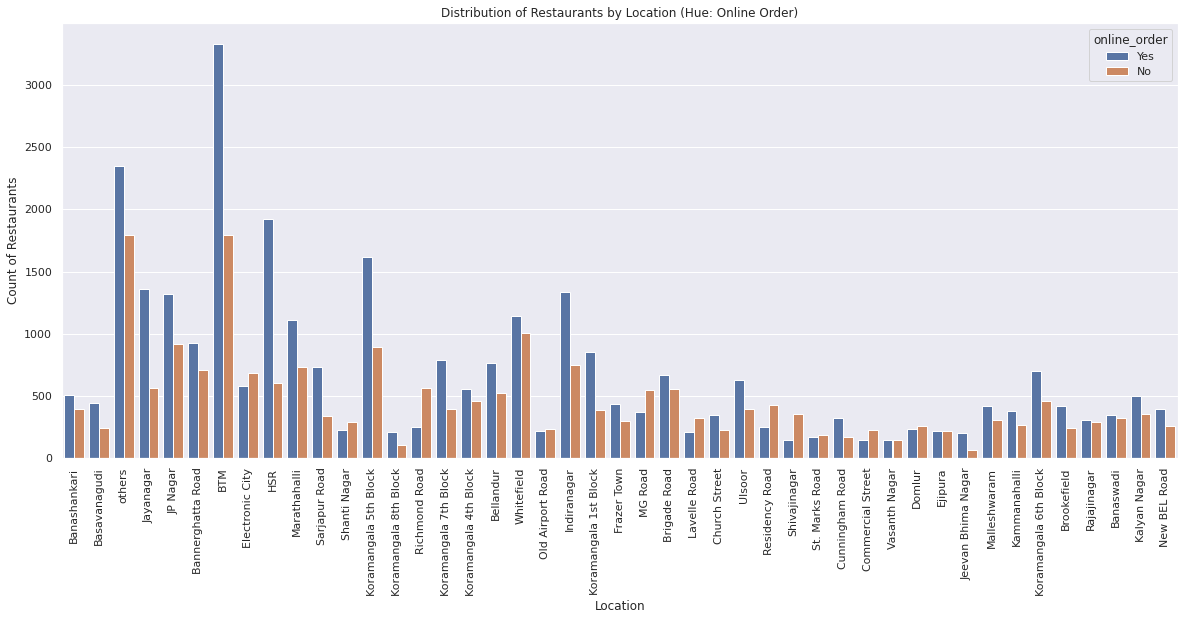

In [57]:
plt.figure(figsize=(20,8))
sns.countplot(x= 'location',data=data,hue='online_order')
plt.title("Distribution of Restaurants by Location (Hue: Online Order)")
plt.xticks(rotation = 90)
plt.ylabel('Count of Restaurants')
plt.xlabel('Location')
plt.show()

* BTM has most number of restuarants among all other locations.

In [58]:
#data[data['location']=='BTM'].count()['location']

> There are total 5098 restaurants in BTM

# Distribution of Restaurants by Location and Book Table

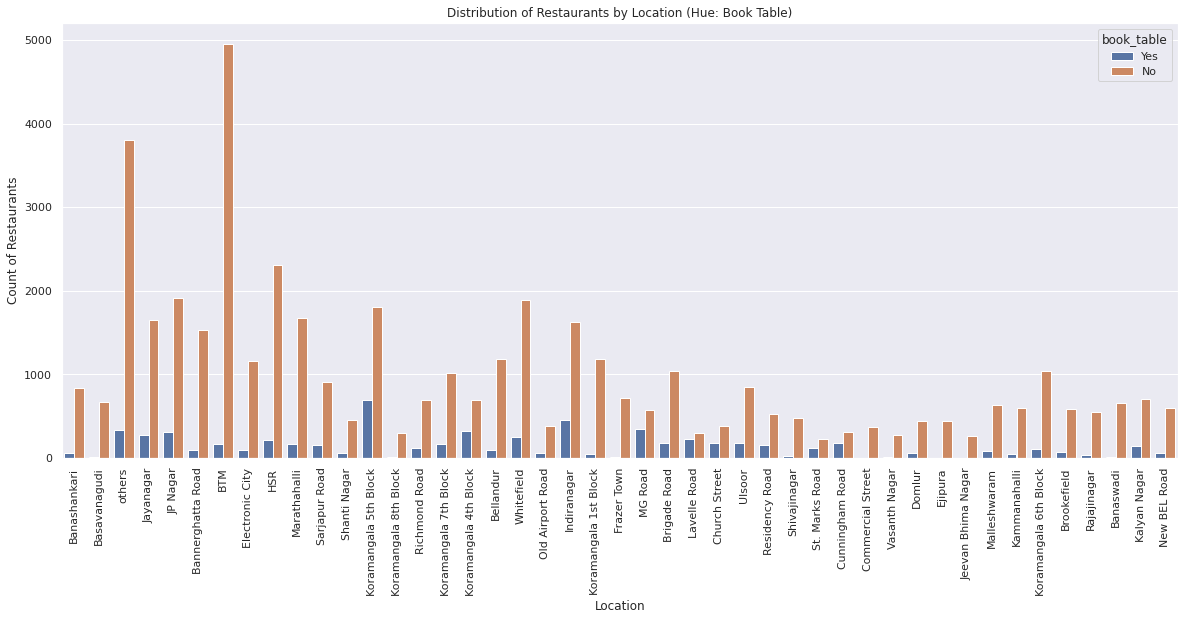

In [59]:
plt.figure(figsize=(20,8))
sns.countplot(x= 'location',data=data,hue='book_table')
plt.title("Distribution of Restaurants by Location (Hue: Book Table)")
plt.xticks(rotation = 90)
plt.ylabel('Count of Restaurants')
plt.xlabel('Location')
plt.show()

* There are very few restaurants offering book table sevice at each location.

# Distribution of Restaurants by Location and Type

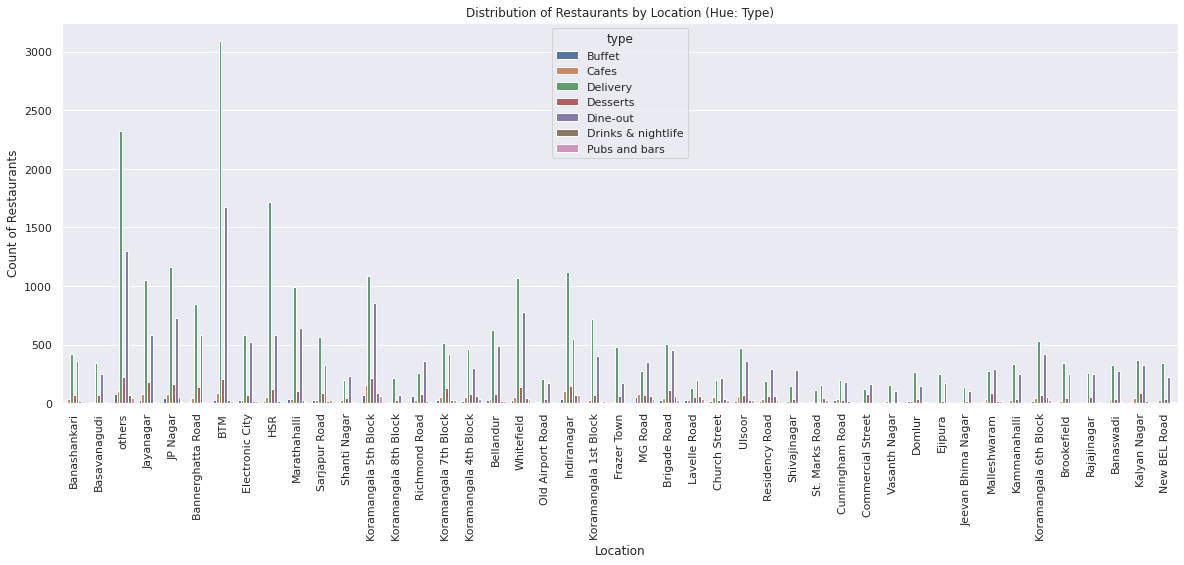

In [60]:
plt.figure(figsize=(20,7))
sns.countplot(data= data, x= 'location',hue='type')
plt.xticks(rotation = 90)
plt.title("Distribution of Restaurants by Location (Hue: Type)")
plt.ylabel('Count of Restaurants')
plt.xlabel('Location')
plt.show()

* It will help in opening of new restaurants at different locations in the city. 

In [61]:
# Cross-tabulation between online_order and book_table
pd.crosstab(data["online_order"], data["book_table"])

book_table,No,Yes
online_order,,
No,18629,2644
Yes,26639,3805


* There are few restaurants where both book_table and online_order are available.

# Number of Restaurants by Online Order

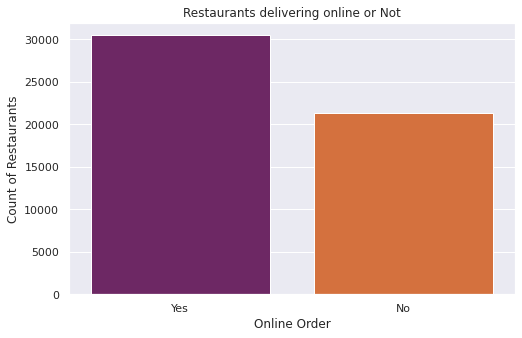

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(x= 'online_order',data=data ,palette = 'inferno')
plt.title('Restaurants delivering online or Not')
plt.xlabel("Online Order")
plt.ylabel('Count of Restaurants')
plt.show()

# Number of Restaurants by Table Bookig

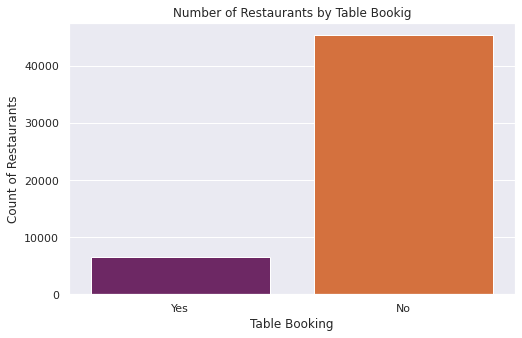

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(x= 'book_table',data= data, palette = 'inferno')
plt.title('Number of Restaurants by Table Bookig')
plt.xlabel("Table Booking")
plt.ylabel('Count of Restaurants')
plt.show()

* There are very few restaurants which are providing book table service.

# Comparison of Ratings with and without Online Booking

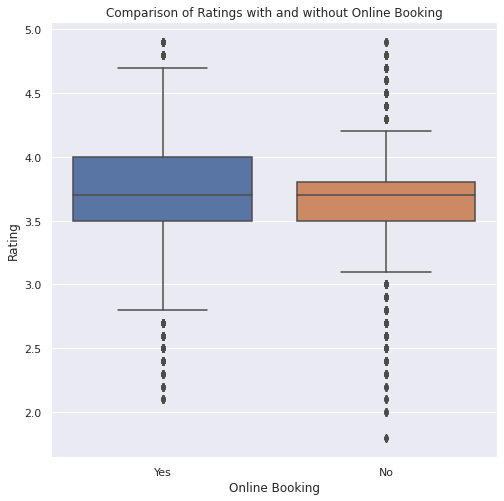

In [64]:
plt.figure(figsize=(8,8))
sns.boxplot(data = data,x = 'online_order', y = 'rate')
plt.title("Comparison of Ratings with and without Online Booking")
plt.xlabel("Online Booking")
plt.ylabel("Rating")
plt.show()

* Both type of restaurants (with and without Online Booking) have almost same median rating.  But their min and max rating differ greatly.

# Comparison of Ratings with and without Table Booking

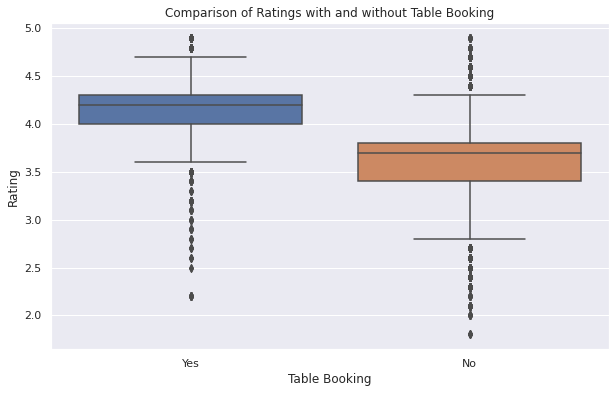

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="book_table", y="rate")
plt.title("Comparison of Ratings with and without Table Booking")
plt.xlabel("Table Booking")
plt.ylabel("Rating")
plt.show()

* Restaurants with book table service tend to have better ratings compared to those without.

# Cuisines by Votes and Rating

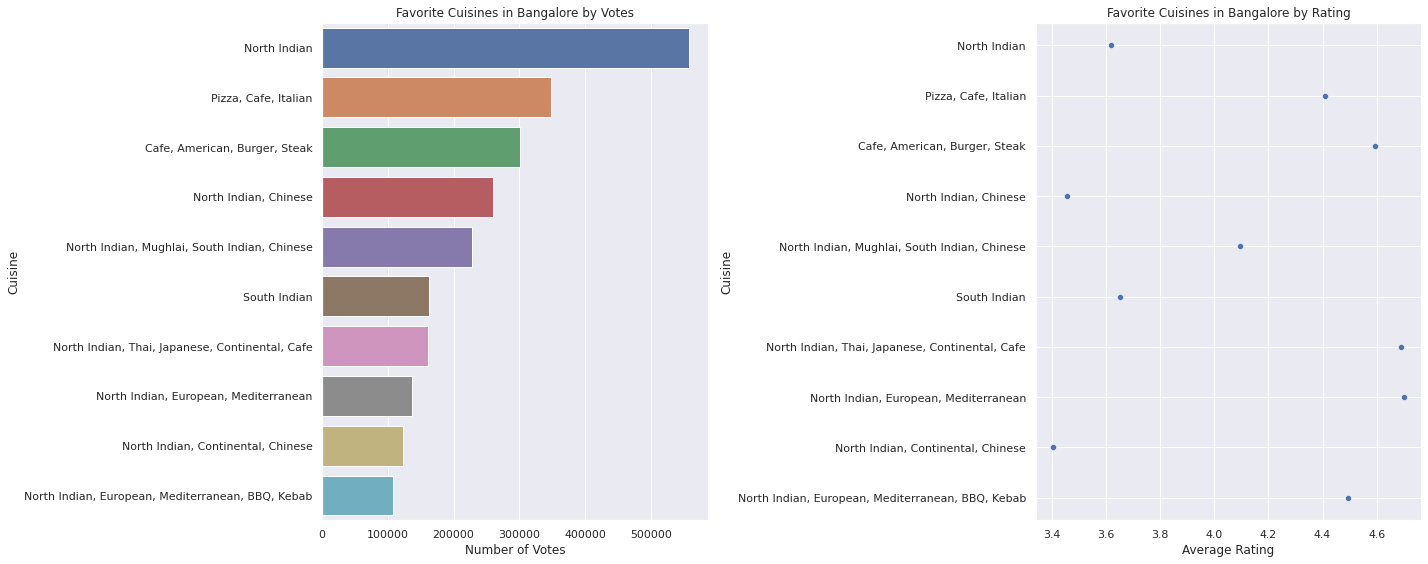

In [66]:
# Group the data by cuisine and calculate the total votes and average rating
cuisine_stats = data.groupby('cuisines').agg({'votes': 'sum', 'rate': 'mean'}).reset_index()

# Sort the cuisines based on total votes in descending order
cuisine_stats = cuisine_stats.sort_values(by='votes', ascending=False).head(10)

plt.figure(figsize=(20, 8))

# Bar plot for number of votes
plt.subplot(1, 2, 1)
sns.barplot(data=cuisine_stats, x='votes', y='cuisines', orient='h')
plt.title("Favorite Cuisines in Bangalore by Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Cuisine")

# Scatter plot for average rating
plt.subplot(1, 2, 2)
sns.scatterplot(data=cuisine_stats, x='rate', y='cuisines')
plt.title("Favorite Cuisines in Bangalore by Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")

plt.tight_layout() 
plt.show()


> These charts will help customers to find famous cuisines in the city. Restaurants also can leverage this information in expanding their business.

* North Indian is the favourite cuisine by number of votes.
* (Pizza, Cafe, Italian) and (Cafe, American, Burger, Steak) are aslo better options considering both votes and rating.

# Insights:

1. **Correlation:** There is not a very strong correlation between votes, cost for 2 persons, and ratings.

2. **Rating Distribution:** Most of the restaurants have ratings between 3.5 and 4, with an average rating of 3.7.

3. **Cost Range:** Restaurants with a cost for 2 persons less than 500 are more numerous, but there are also a few expensive restaurants.

4. **Popular Types:** Buffets and cafes are the most famous restaurant types in the city.

5. **Restaurant Types:** Quick Bites and Casual Dining are the most common types of restaurants.

6. **Top 10 Restaurant Chains:** The top 10 restaurant chains in the city include Cafe Coffee Day, Onesta, Just Bake, Empire Restaurant, Five Star Chicken, Kanti Sweets, Petoo, Polar Bear, Baskin Robbins, and Chef Baker's.

7. **Budget-friendly Locations:** Church Street, Cunningham Road, and St. Marks Road are recommended locations for dining under a budget of Rs. 1000 for 2 persons.

8. **Online Service:** Restaurants with online service tend to receive higher ratings.

9. **Popular Location:** BTM has the highest number of restaurants among all other locations.

10. **Book Table Service:** There are very few restaurants offering book table service at each location, and only a few restaurants provide both book table and online order services.

11. **Ratings by Booking Service:** Restaurants with book table service tend to have better ratings compared to those without.

12. **Favorite Cuisine:** North Indian cuisine is the favorite based on the number of votes.

13. **Recommended Options:** Pizza, Cafe, Italian, and Cafe, American, Burger, Steak are also popular options considering both votes and ratings.

# Recommendations:

1. For a Typical Customer:
   - Explore restaurants with rating above 4, cost2persons around Rs. 400 and votes above 284. They can offer a satisfactory dining experience.
   - Consider budget-friendly and highly rated restuatants' locations such as Church Street, Cunningham Road, and St. Marks Road for dining under Rs. 1000 for 2 persons.
   - Try popular cuisines like North Indian, Pizza, Cafe, Italian, and Cafe, American, Burger, Steak as they are the most famous cuisines in the city.


2. For a Person Who Wants to Open a New Restaurant in The City:
   - Consider opening a buffet or cafe-style restaurant, as they are the most famous types in the city.
   - Focus on providing online ordering services, as it correlates with higher ratings and customer satisfaction.
   - Pay attention to the location selection, with BTM being a popular area, but also explore opportunities in areas like Church Street, Cunningham Road, and St. Marks Road for budget-friendly dining options.
   - Offer book table service, as it tends to result in better ratings and can attract customers seeking a more formal dining experience.

Overall, the insights suggest that a new restaurant should focus on providing good quality food, consider online ordering and book table services, choose a suitable location, and cater to different budget ranges. Understanding customer preferences, particularly for cuisines like North Indian, Pizza, Cafe, Italian, and Cafe, American, Burger, Steak, can help in attracting a diverse customer base. Continuous monitoring of ratings and customer feedback is also recommended to maintain high standards and improve the restaurant's offerings over time.

# Please consider giving an upvote and feel free to contact me if you have any questions or need assistance.
# Thanks